# Visualization of a image throught a ConvNet

The problem consists on identifing the sign language gestures for the digits from 1 to 10.

[Arda Mavi](https://github.com/ardamavi/Sign-Language-Digits-Dataset) has compiled a dataset consisting of 2062 images with the correspoding labels.

This notebook allows to visually understand what transformations happen to an image, when it goes through a ConvNet.

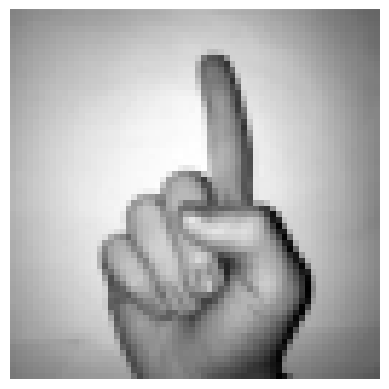

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model, Model

# Load the trained model
model = load_model("model.keras")

# Load the images
images = np.load("dataset/X.npy")

# Get the an example image
first_image = images[401]

# Display the image
plt.imshow(first_image, cmap='gray')
plt.axis('off')
plt.show()

# Preprocess the image: Add batch dimension and ensure it's the correct shape
first_image = np.expand_dims(first_image, axis=0)  # Add batch dimension (1, 64, 64, 1)

## 1st Layer - Convolution

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


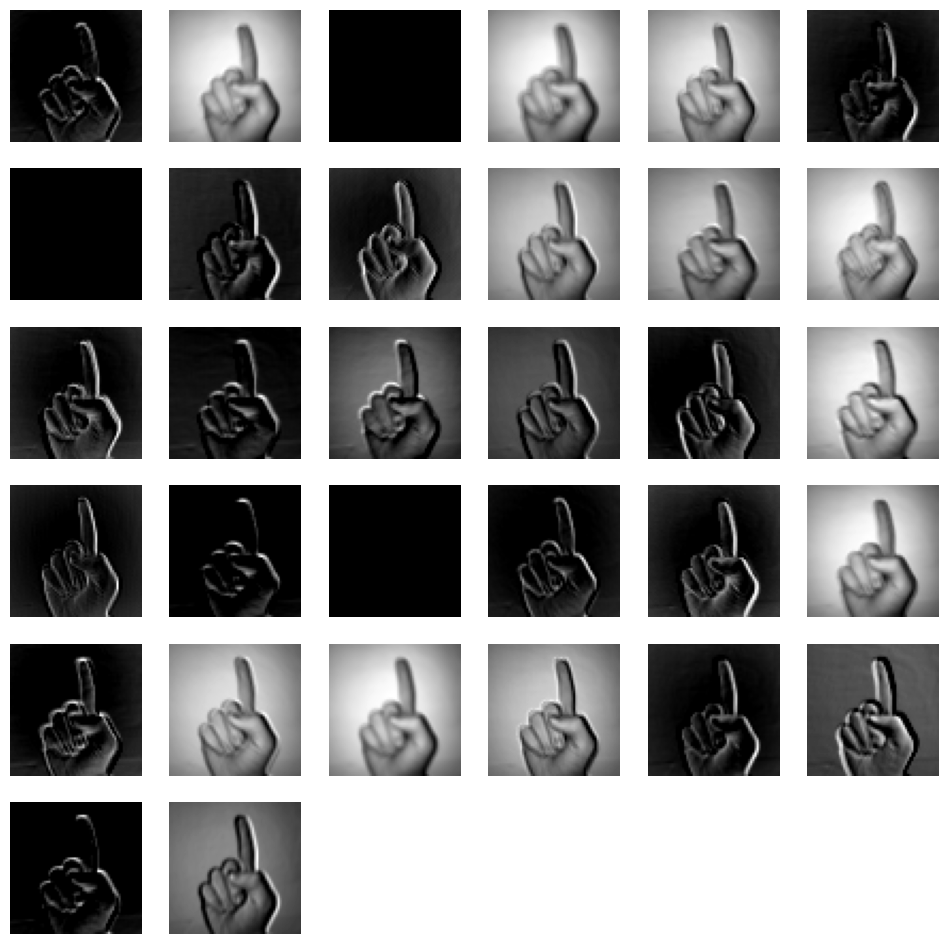

In [14]:
# Define the first convolutional layer name
first_conv_layer_name = "conv2d_3"

# Create a model that outputs feature maps
feature_model = Model(
    inputs=model.inputs,
    outputs=model.get_layer(first_conv_layer_name).output
)

# Get the feature maps
feature_maps = feature_model.predict(first_image)

# Extract the number of filters
num_filters = feature_maps.shape[-1]

# Plot the first 32 feature maps
plt.figure(figsize=(12, 12))
for i in range(num_filters):  # Display up to 32 filters
    plt.subplot(6, 6, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap='gist_gray')  # Feature map of the i-th filter
    plt.axis("off")
plt.show()


## 2nd Layer - MaxPooling2D

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


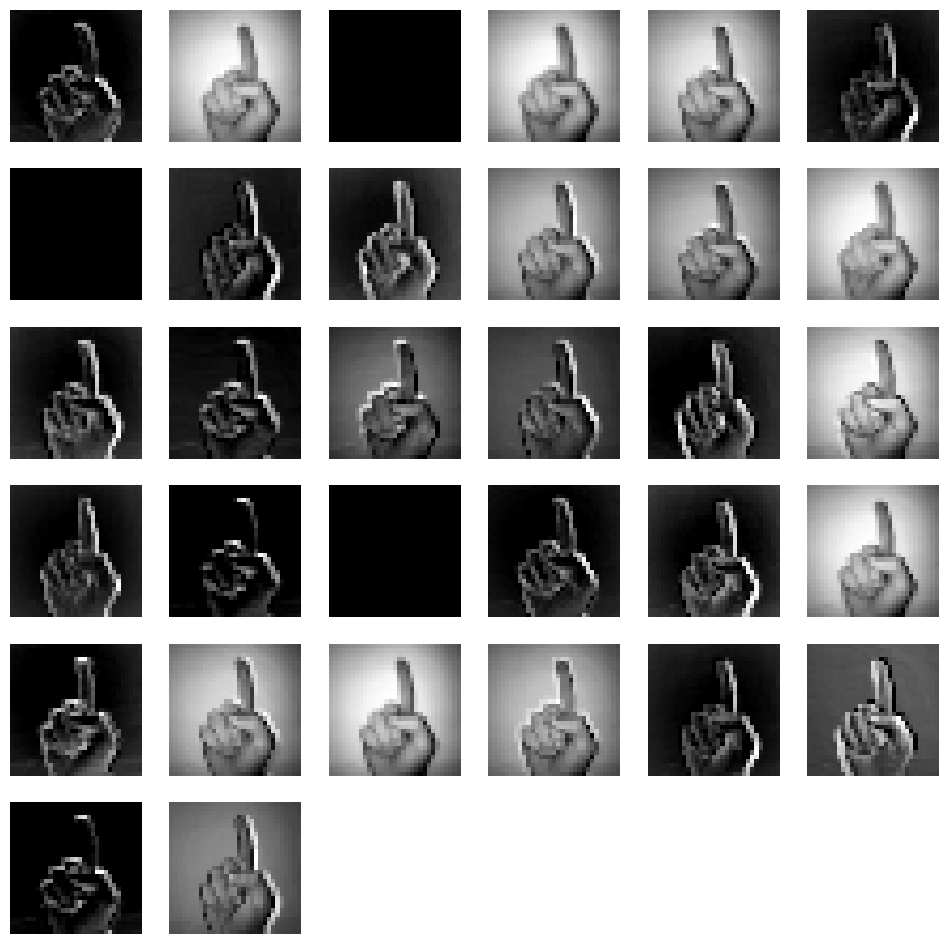

In [20]:
# Define the first MaxPooling2D layer name
first_pooling_layer_name = "max_pooling2d_3"

# Create a model that outputs feature maps
pooling_model = Model(
    inputs=model.inputs,  
    outputs=model.get_layer(first_pooling_layer_name).output
)

# Get the feature maps from the first MaxPooling2D layer
pooled_feature_maps = pooling_model.predict(first_image)

# Extract the number of filters 
num_filters = pooled_feature_maps.shape[-1]

# Plot all the heatmaps
plt.figure(figsize=(12, 12))
for i in range(num_filters): 
    plt.subplot(6, 6, i + 1) 
    plt.imshow(pooled_feature_maps[0, :, :, i], cmap='gist_gray')
    plt.axis("off")
plt.show()


## 3rd Layer - Convolution

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


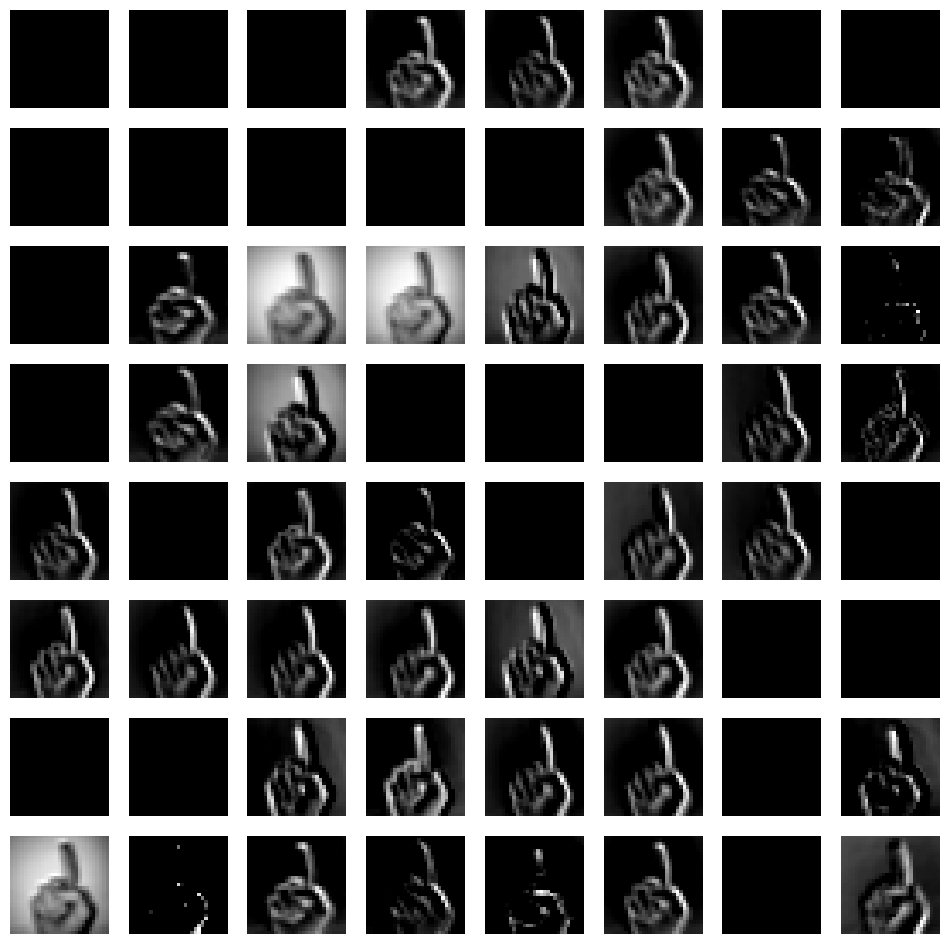

In [32]:
# Define the second convolutional layer name
second_conv_layer_name = "conv2d_4"

# Create a model that outputs feature maps
feature_model = Model(
    inputs=model.inputs,  # Use model.input instead of model.inputs
    outputs=model.get_layer(second_conv_layer_name).output
)

# Get the feature maps
feature_maps = feature_model.predict(first_image)

# Extract the number of filters
num_filters = feature_maps.shape[-1]

# Plot the first 64 feature maps
plt.figure(figsize=(12, 12))
for i in range(num_filters):  # Display up to 64 filters
    plt.subplot(8, 8, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap='gist_gray')  # Feature map of the i-th filter
    plt.axis("off")
plt.show()


## 4th Layer - MaxPooling2D

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


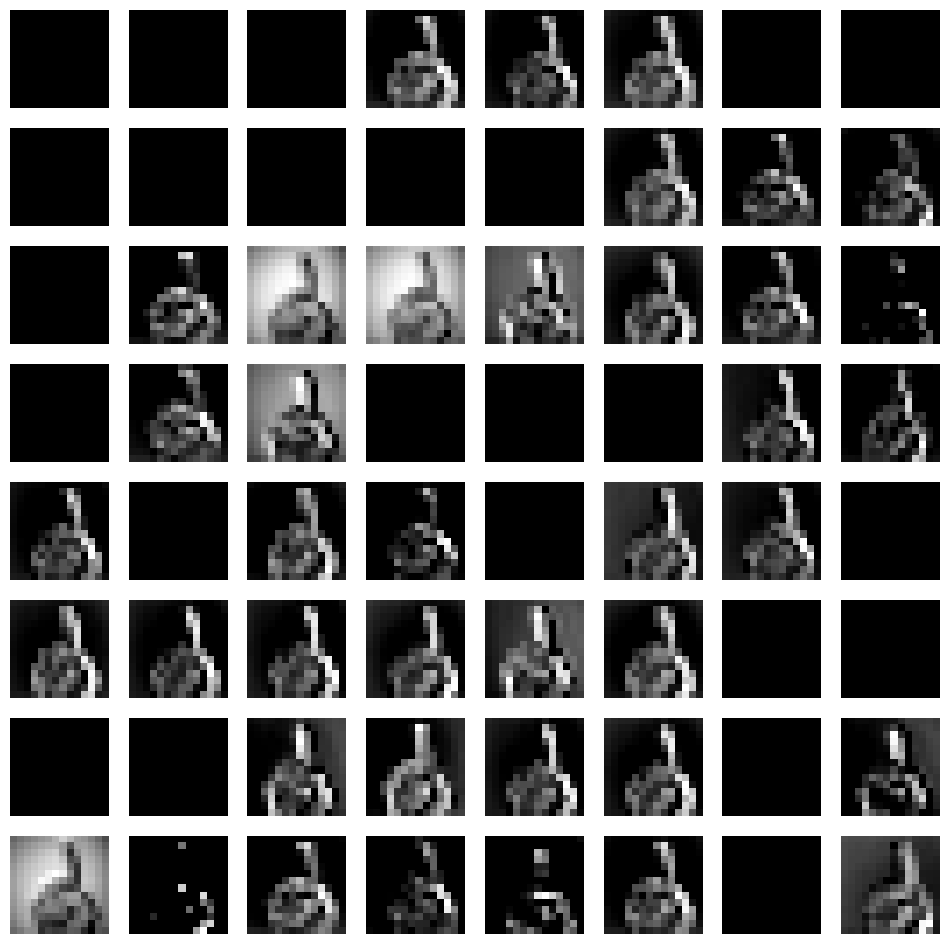

In [22]:
# Define the second MaxPooling2D layer
second_pooling_layer_name = "max_pooling2d_4"

# Create a model that outputs feature maps
pooling_model = Model(
    inputs=model.inputs,
    outputs=model.get_layer(second_pooling_layer_name).output
)

# Get the feature maps 
pooled_feature_maps = pooling_model.predict(first_image)

# Extract the number of filters
num_filters = pooled_feature_maps.shape[-1]

# Plot all the heatmaps
plt.figure(figsize=(12, 12))
for i in range(num_filters):  # Display all filters
    plt.subplot(8, 8, i + 1)  # Adjust grid to fit all the filters (8x8 for 64 filters)
    plt.imshow(pooled_feature_maps[0, :, :, i], cmap='gist_gray')  # Feature map of the i-th filter
    plt.axis("off")
plt.show()


## 5th Layer - Convulution

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


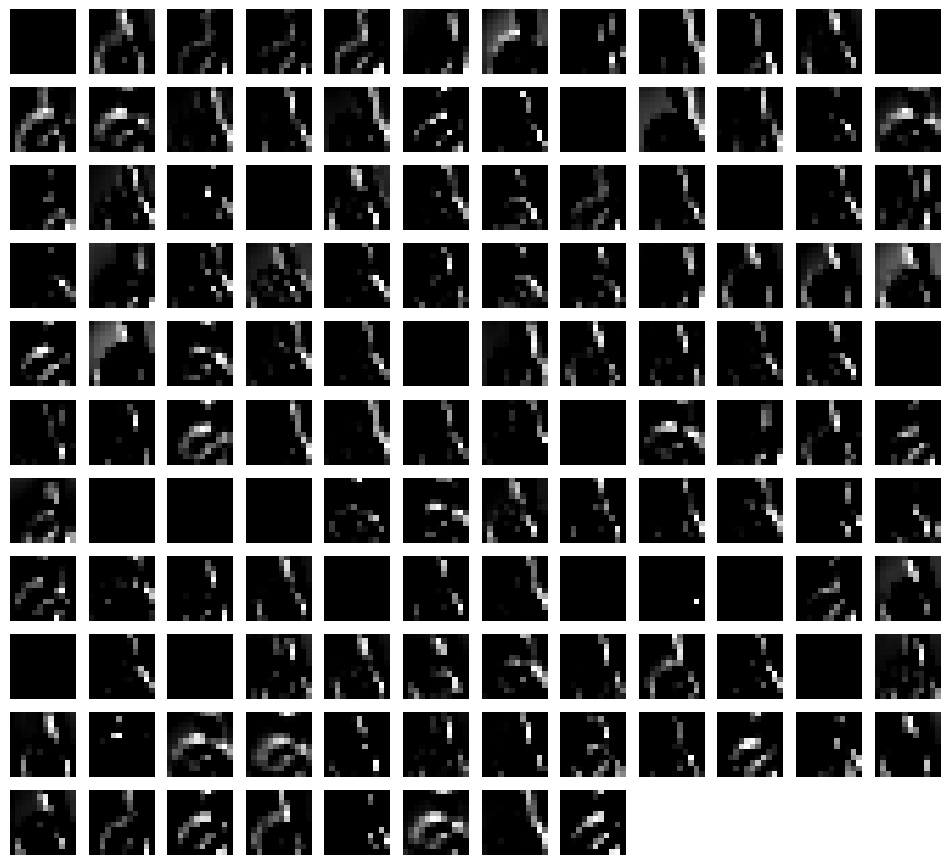

In [38]:
third_conv_layer_name = "conv2d_5"

# Create a model that outputs feature maps
feature_model = Model(
    inputs=model.inputs,
    outputs=model.get_layer(third_conv_layer_name).output
)

# Get the feature maps
feature_maps = feature_model.predict(first_image)

# Extract the number of filters
num_filters = feature_maps.shape[-1]

# Plot all the heatmaps
plt.figure(figsize=(12, 12))
for i in range(num_filters):  # Display all filters
    plt.subplot(12, 12, i + 1)  # Adjust grid to fit all the filters (16x8 for 128 filters)
    plt.imshow(feature_maps[0, :, :, i], cmap='gist_gray')  # Feature map of the i-th filter
    plt.axis("off")
plt.show()


## 6th Layer - MaxPooling2D

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


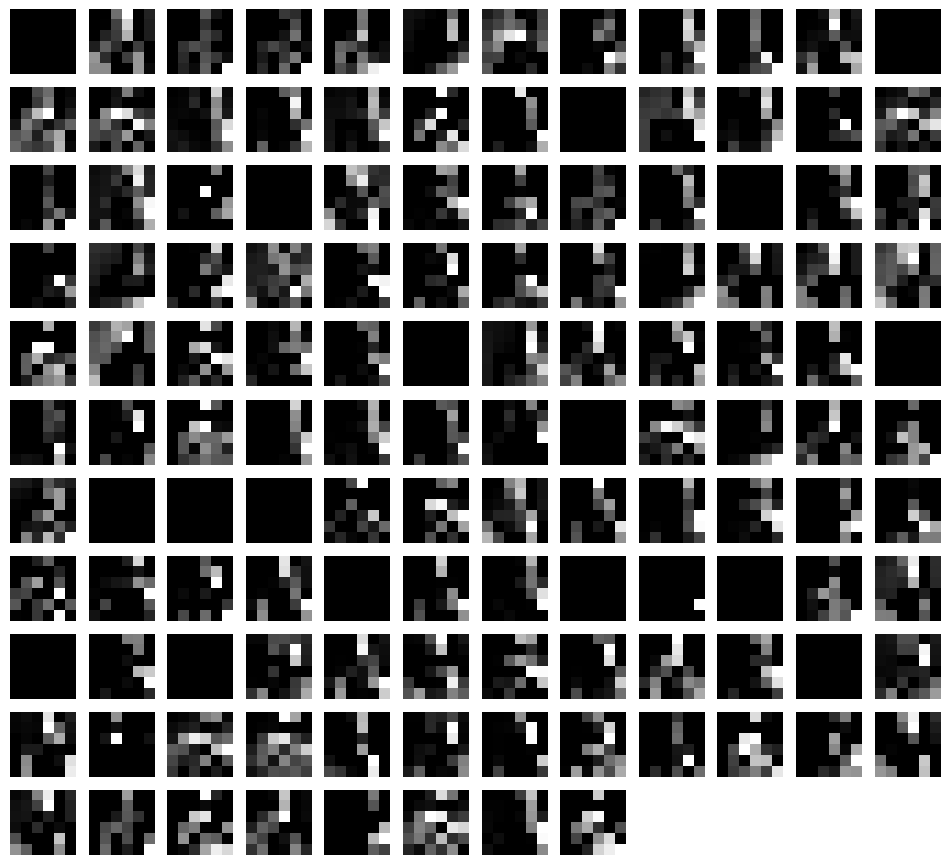

In [40]:
sixth_layer_name = "max_pooling2d_5" 

# Create a model that outputs feature maps
feature_model = Model(
    inputs=model.inputs, 
    outputs=model.get_layer(sixth_layer_name).output
)

# Get the feature maps
feature_maps = feature_model.predict(first_image)

# Extract the number of filters
num_filters = feature_maps.shape[-1]

# Plot all the heatmaps 
plt.figure(figsize=(12, 12))
for i in range(num_filters):  # Display all filters
    plt.subplot(12, 12, i + 1)  # Adjust grid to fit all the filters (12x12)
    plt.imshow(feature_maps[0, :, :, i], cmap='gist_gray')  # Feature map of the i-th filter
    plt.axis("off")
plt.show()


## 8th Layer - Fully connected

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


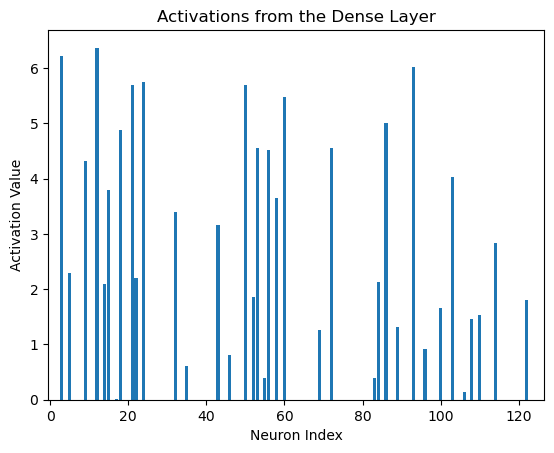

In [26]:
# Define the fully connected (dense) layer
dense_layer_name = "dense_2"

# Create a model that outputs activations
feature_model = Model(
    inputs=model.inputs,
    outputs=model.get_layer(dense_layer_name).output
)

# Get the output activations from the dense layer
feature_maps = feature_model.predict(first_image)

# Since the dense layer output is 1D, it will be a vector
plt.bar(range(len(feature_maps[0])), feature_maps[0])
plt.title('Activations from the Dense Layer')
plt.xlabel('Neuron Index')
plt.ylabel('Activation Value')

plt.xlim(-0.5, 127 - 0.5) 
plt.show()


## 8th Layer - Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


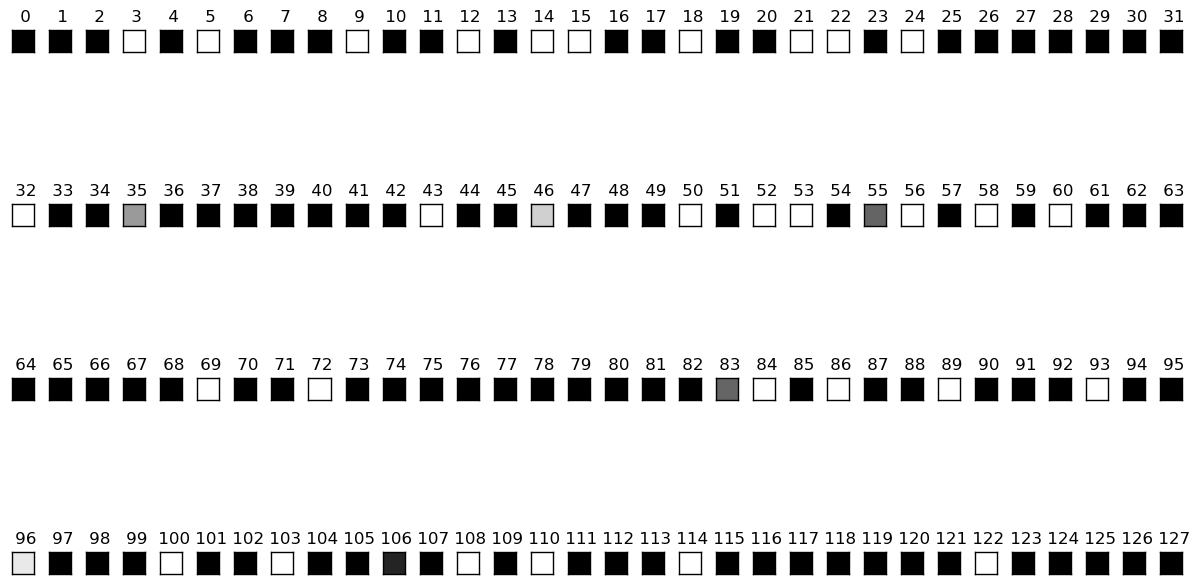

In [66]:
dense_layer_name = "dense_2"

feature_model = Model(
    inputs=model.inputs,
    outputs=model.get_layer(dense_layer_name).output
)

# Get the activations from the dense layer
feature_maps = feature_model.predict(first_image)

# Get the activations (this is a 1D array with activations for each neuron)
activations = feature_maps[0]

# Determine the number of activations
num_activations = len(activations)

# Set the number of rows and columns for the grid (adjust these based on the number of activations)
rows = 4
cols = (num_activations + rows - 1) // rows  # This ensures that the grid fits all activations

# Plot them as individual "images" for each activation
plt.figure(figsize=(12, rows * 2))  # Create a figure with enough space for multiple rows

# Loop over each activation and display it as an individual "image"
for i in range(num_activations):
    ax = plt.subplot(rows, cols, i + 1)  # Plot in a grid with 'rows' rows and 'cols' columns
    
    # Normalize each activation to create a distinct visual representation
    normed_activation = np.reshape(activations[i], (1, 1))  # Still 1x1 pixel
    
    # Create an "image" with color intensity proportional to the activation
    ax.imshow(normed_activation, cmap='gist_gray', vmin=0, vmax=1)  # Explicitly setting vmin and vmax
    ax.title.set_text(f" {i}")
    
    # Add a black border around the image
    for _, spine in ax.spines.items():
        spine.set_edgecolor('black')  # Set the border color to black
        spine.set_linewidth(1)  # Set the border thickness
    
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks

plt.tight_layout()  # Adjust layout for better spacing between images
plt.show()


## Final Layer - 10 Classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


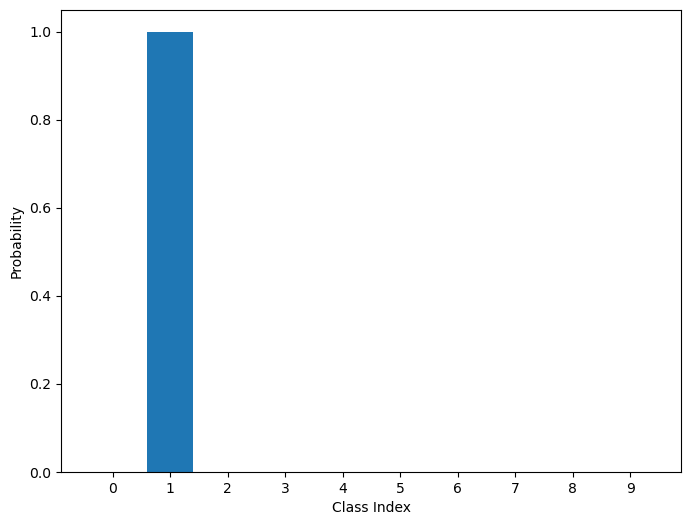

In [70]:
# Define the output layer name
output_layer_name = "dense_3"

# Create a model that outputs activations from the output layer
feature_model = Model(
    inputs=model.inputs,
    outputs=model.get_layer(output_layer_name).output
)

# Get the output probabilities from the final output layer
output_probs = feature_model.predict(first_image)

# Since it's a classification task with 10 classes, we'll visualize the probabilities for each class
plt.figure(figsize=(8, 6))
plt.bar(range(10), output_probs[0])  # Assuming 10 classes for classification
plt.xlabel('Class Index')
plt.ylabel('Probability')
plt.xticks(range(10))  # Label the x-axis with class indices
plt.show()


## Final Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


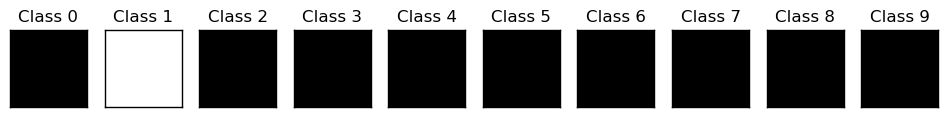

In [72]:
output_probs = feature_model.predict(first_image)  # Get the probabilities from the output layer

# Get the probabilities of the 10 classes for the current image
probabilities = output_probs[0]

# Plot them as individual images for each class
plt.figure(figsize=(12, 1))  # Create a figure with enough space for 10 images

# Loop over each class and display it as an individual image
for i in range(10):
    ax = plt.subplot(1, 10, i + 1)  # Plot in a 1-row, 10-column grid
    # Normalize the probability
    normed_prob = np.reshape(probabilities[i], (1, 1)) 
    
    # Create a image with the color intensity proportional to the probability
    ax.imshow(normed_prob, cmap='gist_gray', vmin=0, vmax=1)
    ax.title.set_text(f"Class {i}")  # Title the image with the class index
    
    # Add a black border around the image (using axes properties directly)
    for _, spine in ax.spines.items():
        spine.set_edgecolor('black')  # Set the border color to black
        spine.set_linewidth(1)  # Set the border thickness
    
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks

plt.show()
